# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'dg'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data'))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
dsCont = pd.DataFrame() # for continuous manual tracking data
for subjDir in allSubjDirs:
    subjDirBasename = os.path.basename(subjDir)
    print subjDirBasename
    subjFilePath = glob.glob(subjDir + '/' + subjDirBasename + '.csv')[0]
    ds = ds.append(pd.read_csv(subjFilePath))
    subjContFilePath = glob.glob(subjDir + '/' + subjDirBasename + '_cont.csv')[0]
    dsCont = dsCont.append(pd.read_csv(subjContFilePath, header=None))
#print ds.head(5)
print ds.shape
print dsCont.shape
print ds.columns

dg_p0_crn-test_s1_r1_2017-01-17_1554
(2, 28)
(2, 1200)
Index([u'expName', u'time', u'participant', u'session', u'run', u'trialN',
       u'dirL', u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'colL',
       u'colR', u'sat', u'trialT', u'nFrames', u'nNa', u'nf000', u'nf090',
       u'nf180', u'nf270', u'pd000', u'pd090', u'pd180', u'pd270'],
      dtype='object')


Transforming the data set first.

In [3]:
# Measuring velocities in dps:
ds.vR_dps = np.round(ds.vR*.15,1)
ds.vL_dps = np.round(ds.vL*.15,1)
# Measuring sf in cycles per degree:
ds.sfL_cpd = np.round(ds.sfL*34,1)
ds.sfR_cpd = np.round(ds.sfR*34,1)
ds.head(5)

,expName,time,participant,session,run,trialN,dirL,dirR,vL,vR,...,nFrames,nNa,nf000,nf090,nf180,nf270,pd000,pd090,pd180,pd270
0,dg,2017-01-17_1554,0,1,1,1,0,180,2.5,2.5,...,60,210,418,0,572,0,0.348333,0.0,0.476667,0.0
1,dg,2017-01-17_1554,0,1,1,2,180,0,2.5,2.5,...,60,464,460,0,276,0,0.383333,0.0,0.230000,0.0


## Behavioural predominance

### Influence of color

### Influence of direction

## Behavioural time course

In [4]:
#print dsCont.head(5)
dsContMat = dsCont.as_matrix()
dsContMat[np.isnan(dsContMat)] = 90
dsContX = np.tile(np.linspace(0,dsContMat.shape[1]-1,num=dsContMat.shape[1]),
                   dsContMat.shape[0])
dsContY = dsContMat.flatten()
dsContHue = np.repeat(np.linspace(0,dsContMat.shape[0]-1,num=dsContMat.shape[0]), 
                    dsContMat.shape[1])
print dsContX[0:5]
print dsContY[0:5]
print dsContHue[0:5]
dsContDF = pd.DataFrame({'frame': dsContX, 'response': dsContY, 'row': dsContHue})
print str(dsContX.shape) + ' ' + str(dsContY.shape) + ' ' + str(dsContHue.shape)

[ 0.  1.  2.  3.  4.]
[ 90.  90.  90.  90.  90.]
[ 0.  0.  0.  0.  0.]
(2400,) (2400,) (2400,)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e6dd0>], dtype=object)

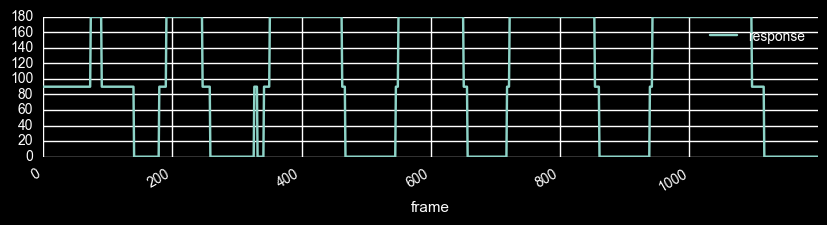

In [99]:
#g = sns.factorplot(x='frame', y='response', col='row', data=dsContDF, col_wrap=4, ci=None)
dsContDF[dsContDF.row==0].plot(x='frame', y='response', subplots=True, figsize=[10,2])
#g = sns.factorplot(x=dsContX, y=dsContY, hue=dsContHue, col_wrap=1, size=3.5, ci=None)
#g.set_axis_labels('frameN','angle')
#plt.ylim(-0.1,1.1)

# Eye-tracking data

## Data import

In [6]:
subjEtPath = glob.glob(allSubjDirs[0] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
samps = interp_eyelink_blinks(samps, events, interp_fields=["x_l",'x_r'])
samps = interp_zeros(samps, interp_fields=["x_l",'x_r'])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
from cili.extract import extract_event_ranges

/Users/egor/Dropbox/Projects/md/data/dg_p0_crn-test_s1_r1_2017-01-17_1554/data.asc
           x_l    y_l   pup_l     x_r    y_r   pup_r
onset                                               
187045  1000.0  330.0  6985.0  1087.5  330.0  7195.0
187047   999.8  330.0  6987.0  1087.4  330.0  7197.0
187049  1000.1  330.0  6995.0  1087.1  330.0  7199.0
187051   999.8  330.0  7001.0  1086.7  330.0  7201.0
187053   999.5  330.0  7006.0  1086.8  330.0  7210.0
Index([u'x_l', u'y_l', u'pup_l', u'x_r', u'y_r', u'pup_r'], dtype='object')


/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/cili/util.py:244: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df[nums] = df[nums].convert_objects(convert_numeric=True)
/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/cili/cleanup.py:233: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=100,center=False).mean()
  reversed_dfs_ravg = np.array(pd.rolling_mean(pd.Series(reversed_dfs),window=kernel_size, min_periods=1))


In [7]:
#ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s] # the string to look into
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr]) # time stamp
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr]) # trial number
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
# Collating the above into a data frame for lookup:
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
#print np.max(trials['trialLength'])
print trials.head(5)

   trialN  trialTS  trialStartTS  trialEndTS  trialLength
0       1   186489        187043      206594        19551
1       2   210371        210925      230472        19547


In [8]:
# For each trial, take the appropriate chunk of em samps:
trialSamps = samps[((samps.index>=trials.trialStartTS[1]) & 
                    (samps.index<=trials.trialEndTS[1]))]
print trialSamps.shape
trialSamps.head(5)

(9774, 6)


,x_l,y_l,pup_l,x_r,y_r,pup_r
onset,,,,,,
210925,966.6,330.0,8894.0,1109.6,330.0,9201.0
210927,966.9,330.0,8889.0,1109.5,330.0,9196.0
210929,966.9,330.0,8888.0,1109.1,330.0,9198.0
210931,966.9,330.0,8893.0,1109.1,330.0,9199.0
210933,967.0,330.0,8894.0,1108.9,330.0,9200.0


## Raw response

In [64]:
# Converting to degrees and seconds:
emdf = pd.DataFrame({'dg_l' : trialSamps['x_l'] / -45.7 + 42.7/2,
                     'dg_r' : trialSamps['x_r'] / -45.7 + 42.7/2
                    })
emdf.index = trialSamps.index / 977.75
emdf.head(5)

,dg_l,dg_r
onset,,
215.724879,0.199015,-2.930088
215.726924,0.192451,-2.927899
215.728970,0.192451,-2.919147
215.731015,0.192451,-2.919147
215.733061,0.190263,-2.914770


### Behavioral

array([<matplotlib.axes._subplots.AxesSubplot object at 0x186c6a70>], dtype=object)

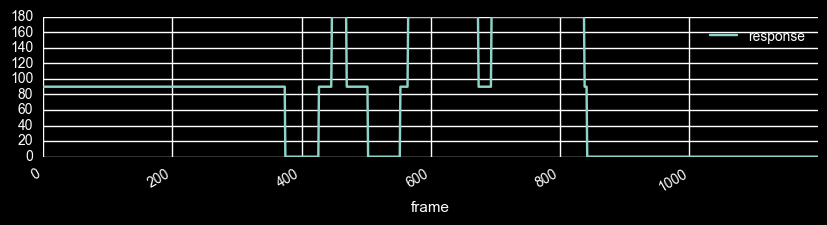

In [93]:
dsContDF[dsContDF.row==1].plot(x='frame', y='response', subplots=True, figsize=[10,2])

### Eye movements

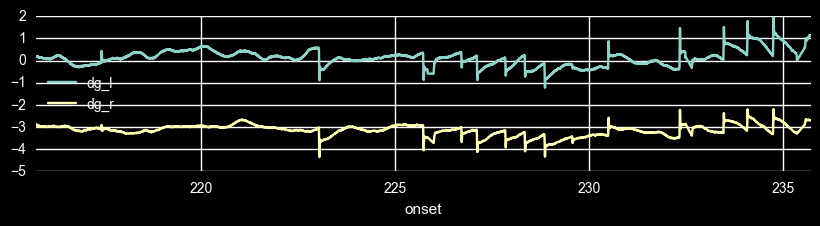

In [92]:
emdf.plot(y=['dg_l','dg_r'], figsize=[10,2])

## Filtering

### Derivatives

In [100]:
# Derivatives:
emdf['d1_l'] = np.gradient(emdf['dg_l'])*977.75 # velocity
emdf['d1_r'] = np.gradient(emdf['dg_r'])*977.75
emdf['d2_l'] = np.gradient(emdf['d1_l']) # acceleration
emdf['d2_r'] = np.gradient(emdf['d1_r'])
emdf['d3_l'] = np.gradient(emdf['d2_l']) # derivative of acceleration
emdf['d3_r'] = np.gradient(emdf['d2_r'])
emdf.head(5)

,dg_l,dg_r,d1_l,d1_r,d2_l,d2_r,d3_l,d3_r,d1_l_sm,d1_r_sm,...,d2_r_sm,d3_l_sm,d3_r_sm,dg_l_flt,d1_l_flt,d1_l_flt2,d1_l_flt3,d1_l_smFlt,d1_l_smFlt2,d1_l_smFlt3
onset,,,,,,,,,,,,,,,,,,,,,
215.724879,0.199015,-2.930088,-6.418490,2.139497,3.209245,3.209245,0.000000,-2.139497e+00,-0.000929,0.000230,...,-0.000147,-0.000137,-0.000140,NaN,-0.006565,-0.006565,-0.006565,-0.000929,-0.000929,NaN
215.726924,0.192451,-2.927899,-3.209245,5.348742,3.209245,1.069748,-1.069748,-2.406934e+00,-0.000929,0.000228,...,-0.000146,-0.000137,-0.000139,NaN,-0.003282,-0.003282,-0.003282,-0.000929,-0.000929,NaN
215.728970,0.192451,-2.919147,0.000000,4.278993,1.069748,-1.604623,-2.139497,-2.674371e-01,-0.000930,0.000224,...,-0.000146,-0.000137,-0.000139,NaN,0.000000,0.000000,0.000000,-0.000930,-0.000930,NaN
215.731015,0.192451,-2.919147,-1.069748,2.139497,-1.069748,0.534874,-1.337185,2.139497e+00,-0.000932,0.000216,...,-0.000145,-0.000136,-0.000138,NaN,-0.001094,-0.001094,-0.001094,-0.000932,-0.000932,NaN
215.733061,0.190263,-2.914770,-2.139497,5.348742,-1.604623,2.674371,0.534874,8.684164e-13,-0.000935,0.000206,...,-0.000144,-0.000135,-0.000137,NaN,-0.002188,-0.002188,-0.002188,-0.000935,-0.000935,NaN


### Smoothing

In [101]:
# Smoothing (.1s in width)
window_len = 97 # ~977.75/10, i.e., the number of rows in .1s
# Smoothing (based on http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html)
def smooth(x, window_len=11, window='hanning'):
    # window_len must be an odd number
    # window can be 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]] # signal with added chunks at ends
    w = eval('np.'+window+'(window_len)') # getting a window distribution from numpy
    y = np.convolve(w/w.sum(), s, mode='valid') # convolving the signal with the window
    return y[(window_len/2):-(window_len/2)] # otherwise returns a lengthened array

In [102]:
# Applying the smoothing function to the derivatives:
emdf['d1_l_sm'] = smooth(np.array(emdf.d1_l), window_len)
emdf['d1_r_sm'] = smooth(np.array(emdf.d1_r), window_len)
emdf['d2_l_sm'] = smooth(np.array(emdf.d2_l), window_len)
emdf['d2_r_sm'] = smooth(np.array(emdf.d2_r), window_len)
emdf['d3_l_sm'] = smooth(np.array(emdf.d3_l), window_len)
emdf['d3_r_sm'] = smooth(np.array(emdf.d3_r), window_len)

In [103]:
emdf.head()

,dg_l,dg_r,d1_l,d1_r,d2_l,d2_r,d3_l,d3_r,d1_l_sm,d1_r_sm,...,d2_r_sm,d3_l_sm,d3_r_sm,dg_l_flt,d1_l_flt,d1_l_flt2,d1_l_flt3,d1_l_smFlt,d1_l_smFlt2,d1_l_smFlt3
onset,,,,,,,,,,,,,,,,,,,,,
215.724879,0.199015,-2.930088,-6.418490,2.139497,3.209245,3.209245,0.000000,-2.139497e+00,-0.908056,0.224428,...,-0.143331,-0.134386,-0.136514,NaN,-0.006565,-0.006565,-0.006565,-0.000929,-0.000929,NaN
215.726924,0.192451,-2.927899,-3.209245,5.348742,3.209245,1.069748,-1.069748,-2.406934e+00,-0.908450,0.222993,...,-0.143215,-0.134206,-0.136353,NaN,-0.003282,-0.003282,-0.003282,-0.000929,-0.000929,NaN
215.728970,0.192451,-2.919147,0.000000,4.278993,1.069748,-1.604623,-2.139497,-2.674371e-01,-0.909534,0.218695,...,-0.142820,-0.133755,-0.135858,NaN,0.000000,0.000000,0.000000,-0.000930,-0.000930,NaN
215.731015,0.192451,-2.919147,-1.069748,2.139497,-1.069748,0.534874,-1.337185,2.139497e+00,-0.911257,0.211599,...,-0.142028,-0.133095,-0.135062,NaN,-0.001094,-0.001094,-0.001094,-0.000932,-0.000932,NaN
215.733061,0.190263,-2.914770,-2.139497,5.348742,-1.604623,2.674371,0.534874,8.684164e-13,-0.913730,0.201832,...,-0.140759,-0.132170,-0.134076,NaN,-0.002188,-0.002188,-0.002188,-0.000935,-0.000935,NaN


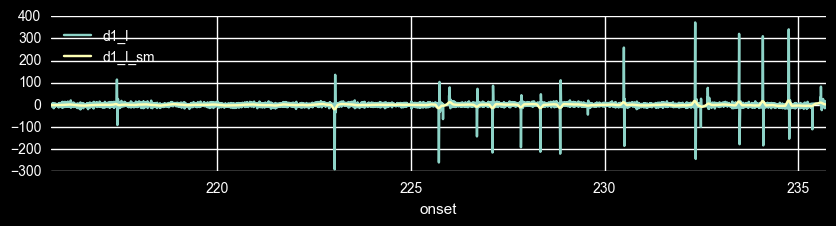

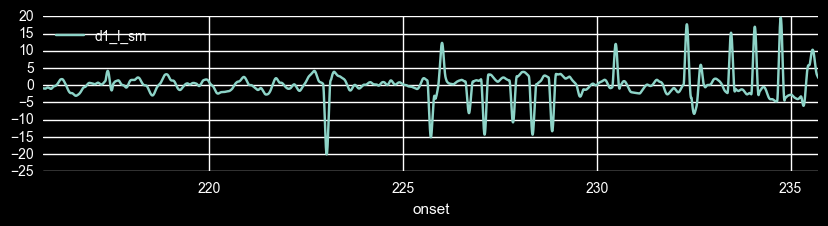

In [104]:
# Displaying the raw velocity:
emdf.plot(y=['d1_l','d1_l_sm'], figsize=[10,2])
emdf.plot(y=['d1_l_sm'], figsize=[10,2])

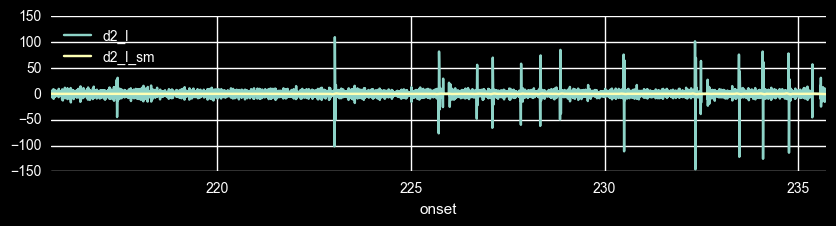

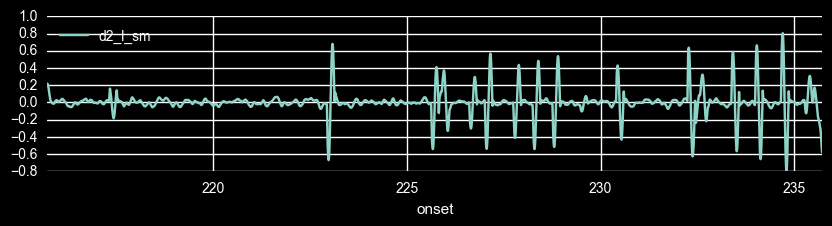

In [105]:
# Displaying the smoothed velocity:
emdf.plot(y=['d2_l','d2_l_sm'], figsize=[10,2])
emdf.plot(y=['d2_l_sm'], figsize=[10,2])

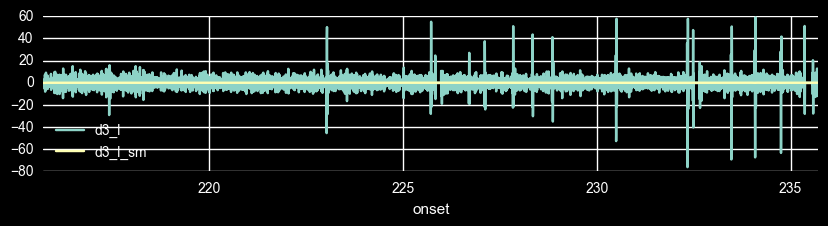

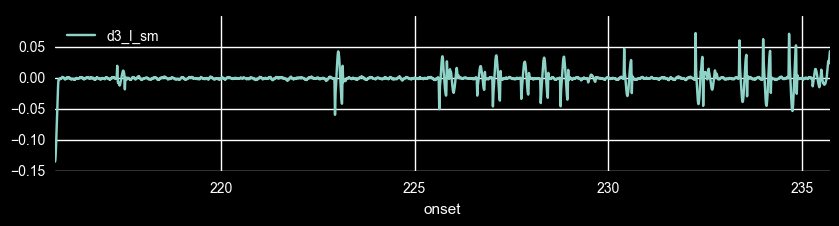

In [106]:
emdf.plot(y=['d3_l','d3_l_sm'], figsize=[10,2])
emdf.plot(y=['d3_l_sm'], figsize=[10,2])

### Thresholding

In [107]:
#threshRaw = [5.2,.2,.04]
threshSm = threshRaw # [5.2,.1,.01]
threshSm = [5,.2,.04]

#### On raw

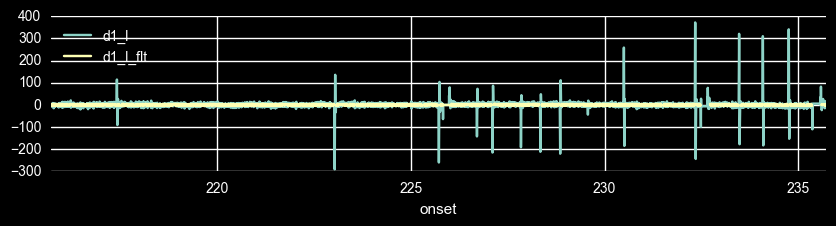

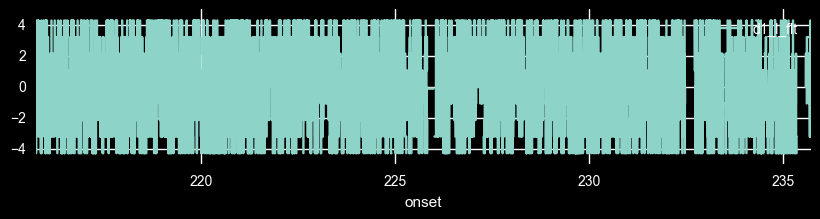

In [108]:
emdf['d1_l_flt'] = emdf.d1_l
emdf.ix[emdf.d1_l>threshRaw[0], 'd1_l_flt'] = np.nan #.5
emdf.ix[emdf.d1_l<-threshRaw[0], 'd1_l_flt'] = np.nan #-.5
emdf.plot(y=['d1_l','d1_l_flt'], figsize=[10,2])
emdf.plot(y=['d1_l_flt'], figsize=[10,2])

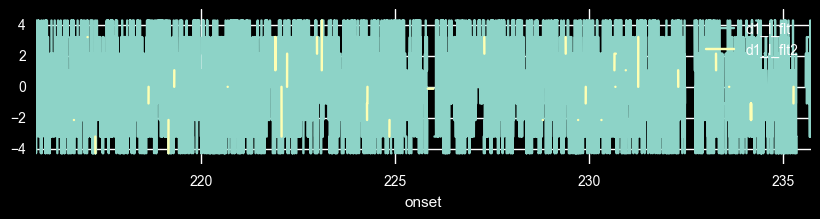

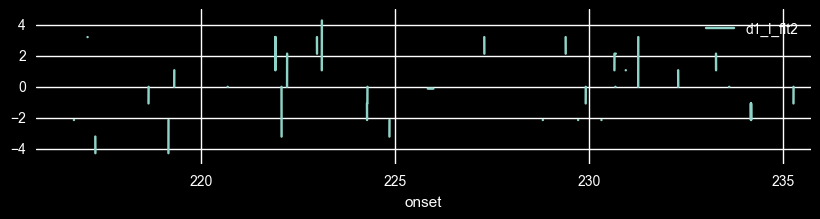

In [109]:
emdf['d1_l_flt2'] = emdf.d1_l_flt
emdf.ix[emdf.d2_l>threshRaw[1], 'd1_l_flt2'] = np.nan #.5
emdf.ix[emdf.d2_l<-threshRaw[1], 'd1_l_flt2'] = np.nan #-.5
emdf.plot(y=['d1_l_flt','d1_l_flt2'], figsize=[10,2])
emdf.plot(y=['d1_l_flt2'], figsize=[10,2])

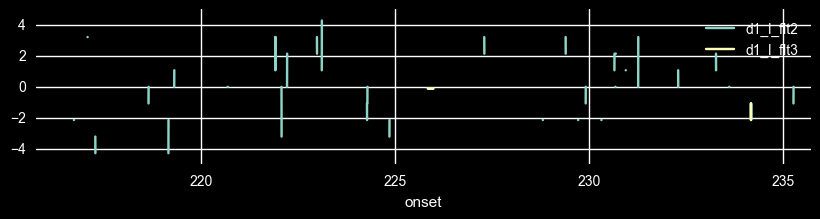

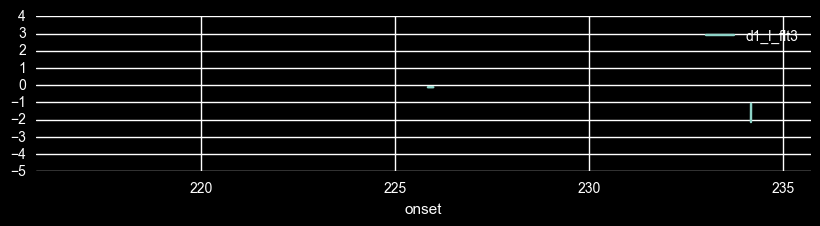

In [110]:
emdf['d1_l_flt3'] = emdf.d1_l_flt2
emdf.ix[emdf.d3_l>threshRaw[2], 'd1_l_flt3'] = np.nan #.5
emdf.ix[emdf.d3_l<-threshRaw[2], 'd1_l_flt3'] = np.nan #-.5
emdf.plot(y=['d1_l_flt2','d1_l_flt3'], figsize=[10,2])
emdf.plot(y=['d1_l_flt3'], figsize=[10,2])

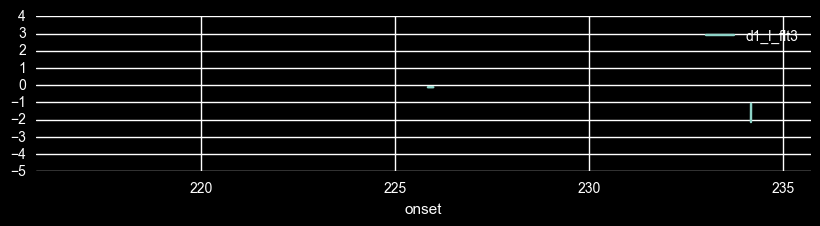

In [111]:
emdf.plot(y='d1_l_flt3', figsize=[10,2])

#### On smoothed

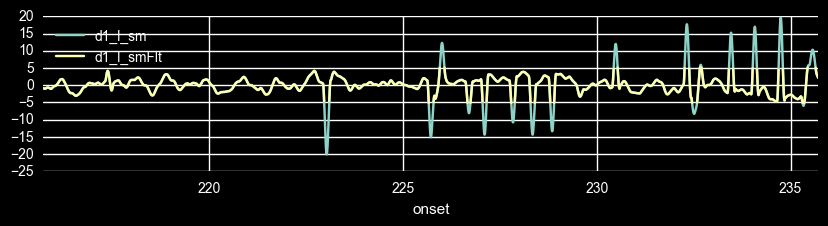

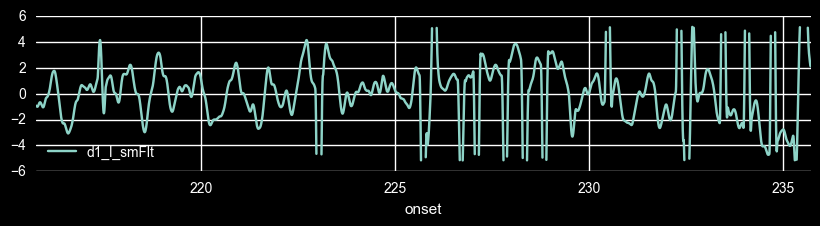

In [112]:
emdf['d1_l_smFlt'] = emdf.d1_l_sm
emdf.ix[emdf.d1_l_sm>threshSm[0], 'd1_l_smFlt'] = np.nan #.5
emdf.ix[emdf.d1_l_sm<-threshSm[0], 'd1_l_smFlt'] = np.nan #-.5
emdf.plot(y=['d1_l_sm','d1_l_smFlt'], figsize=[10,2])
emdf.plot(y=['d1_l_smFlt'], figsize=[10,2])

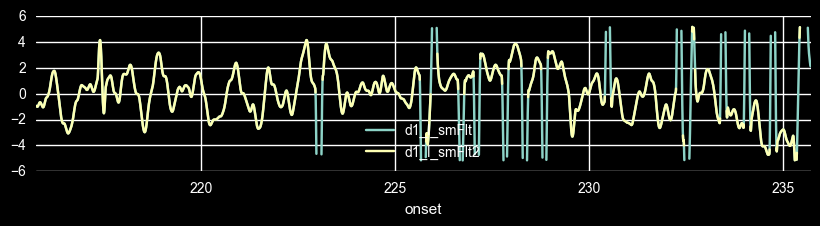

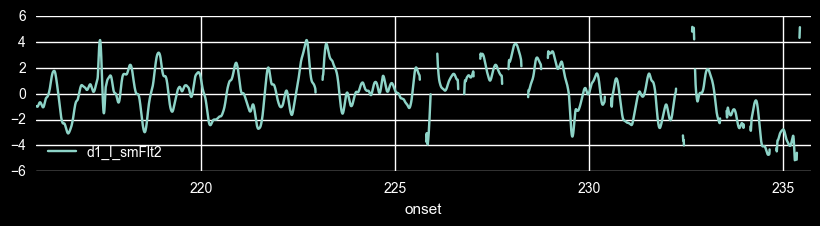

In [113]:
emdf['d1_l_smFlt2'] = emdf.d1_l_smFlt
emdf.ix[emdf.d2_l_sm>threshSm[1], 'd1_l_smFlt2'] = np.nan #.5
emdf.ix[emdf.d2_l_sm<-threshSm[1], 'd1_l_smFlt2'] = np.nan #-.5
emdf.plot(y=['d1_l_smFlt','d1_l_smFlt2'], figsize=[10,2])
emdf.plot(y=['d1_l_smFlt2'], figsize=[10,2])

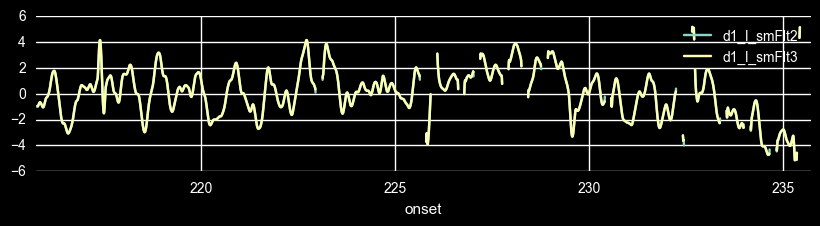

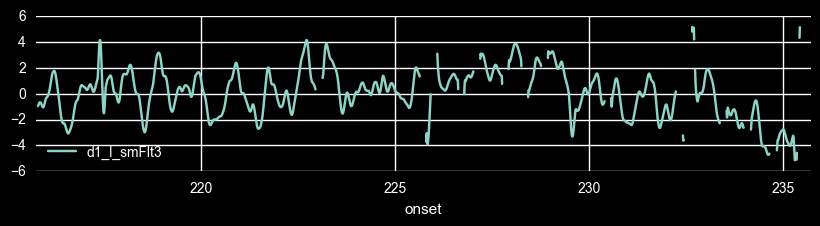

In [114]:
emdf['d1_l_smFlt3'] = emdf.d1_l_smFlt2
emdf.ix[emdf.d3_l_sm>threshSm[2], 'd1_l_smFlt3'] = np.nan #.5
emdf.ix[emdf.d3_l_sm<-threshSm[2], 'd1_l_smFlt3'] = np.nan #-.5
emdf.plot(y=['d1_l_smFlt2','d1_l_smFlt3'], figsize=[10,2])
emdf.plot(y=['d1_l_smFlt3'], figsize=[10,2])

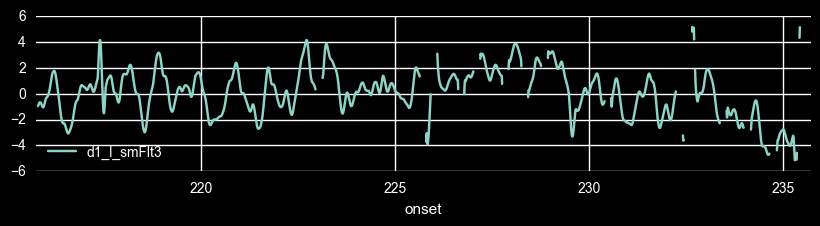

In [115]:
emdf.plot(y='d1_l_smFlt3', figsize=[10,2])

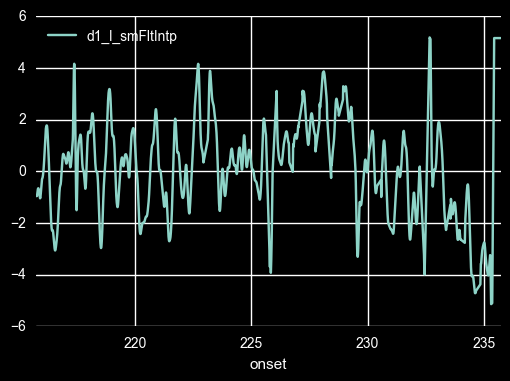

In [150]:
#nonBlanks = emdf.index[not (np.isnan(emdf.d1_l_smFlt3))]
#print np.sum(emdf.d1_l_smFlt3.notnull())
#nonBlanks = emdf.index[emdf.d1_l_smFlt3.notnull()]
#blanks = emdf.index[emdf.d1_l_smFlt3 == np.nan]
#print np.shape(emdf.index)
#print np.shape(nonBlanks)
#print np.shape(blanks)
emdf['d1_l_smFltIntp'] = np.interp(emdf.index,
                                   emdf.index[emdf.d1_l_smFlt3.notnull()], 
                                   emdf.d1_l_smFlt3[emdf.d1_l_smFlt3.notnull()])
emdf.plot(y='d1_l_smFltIntp')

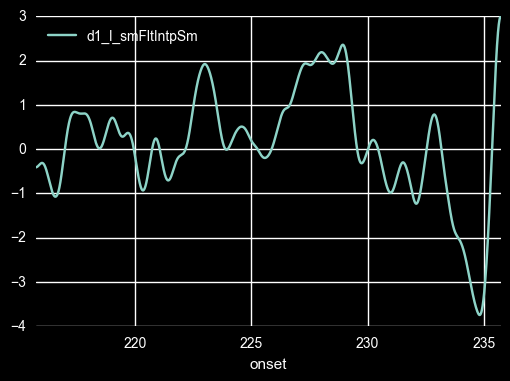

In [154]:
emdf['d1_l_smFltIntpSm'] = smooth(np.array(emdf.d1_l_smFltIntp), window_len*7)
emdf.plot(y='d1_l_smFltIntpSm')